# Author: Soora Sampath

# Task 1: Prediction using Supervised ML

# The Spark Foundation

# Data Science and Business Analytics

Task is to predict the precentage of a student based on number of study hours  

# Installing libraries

In [14]:
#Importing library files
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

# Loading the raw data

In [7]:
rawData = pd.read_csv(r"C:\Users\Sampath\Desktop\student_scores - student_scores.csv")

In [9]:
rawData

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [10]:
type(rawData)

pandas.core.frame.DataFrame

In [11]:
rawData.shape

(25, 2)

# Finding the relationship between the two using scatter plot

Text(0.5, 1.0, 'Student Score Predictor')

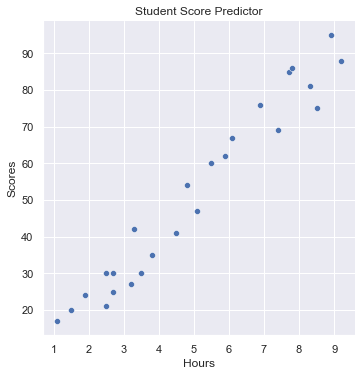

In [15]:
sns.set(style="darkgrid")
sns.relplot(x="Hours", y="Scores", data=rawData)
plt.title("Student Score Predictor")

# Finding the relationship between No of Hours and score using Line Plot

Text(0.5, 1.0, 'Student Score Predictor')

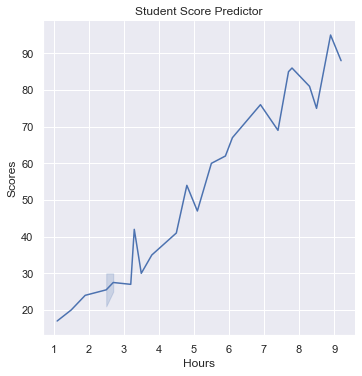

In [17]:
sns.set(style="darkgrid")
sns.relplot(x="Hours", y="Scores", data=rawData, kind="line")
plt.title("Student Score Predictor")

After plotting these two graphs We see that , as the no of hours has increased marks has also increase since the graph is showing linear relationship.

# Prediction Model using Linear Regression

In [19]:
x = rawData. iloc[:,:-1].values
y = rawData.iloc[:,-1].values

In [20]:
x

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [21]:
y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86], dtype=int64)

# Splitting the data

In [22]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [23]:
print(y_test)

[20 27 69 30 62]


In [24]:
x_train=x_train.reshape((-1,1))
y_train=y_train.reshape((-1,1))
x_test=x_test.reshape((-1,1))
y_test=y_test.reshape((-1,1))

# Checking the split

In [25]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(20, 1)
(20, 1)
(5, 1)
(5, 1)


# Training the model

In [26]:
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [28]:
x=x.reshape((-1,1))

# Visualizing the regression line

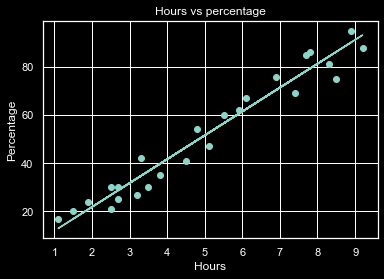

In [29]:
plt.style.use('dark_background')
plt.title('Hours vs percentage')
plt.scatter(x,y)
plt.plot(x,x*lr.coef_+lr.intercept_)
plt.xlabel('Hours')
plt.ylabel('Percentage')
plt.show()

# Testing

In [30]:
y_pred=lr.predict(x_test)
print(y_pred)

[[16.88414476]
 [33.73226078]
 [75.357018  ]
 [26.79480124]
 [60.49103328]]


In [31]:
print(y_test)

[[20]
 [27]
 [69]
 [30]
 [62]]


# Prediciting for 9.25 hours

In [32]:
x_test[1].shape

(1,)

In [33]:
hours=np.array([9.25,])
hours=hours.reshape((-1,1))
ans=lr.predict(hours)
print("The predicted score for 9.25 hours is {}".format(ans))

The predicted score for 9.25 hours is [[93.69173249]]


The final percentage of student after studying for 9.25 hours is 93.69%.

# Evaluating the model using R-score

In [34]:
def r2_score(y,y_):
    num=np.sum((y-y_)**2)
    denom=np.sum((y-y.mean())**2)
    score=(1-num/denom)
    return score*100
r2_score(y_test,y_pred)

94.54906892105356